<a href="https://colab.research.google.com/github/SharmaAshwini/UNT/blob/main/Methods%20in%20Empirical%20Analysis/Exercise_5_Image_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ICE-5 Machine learning with image features

## (Tutorial) Image Gradients
The difference in value between neighboring pixels is called an image gradient.<br>
We'll learn how to compute the image gradients with the following codes

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from skimage.feature import hog
from skimage import data, color, exposure
import cv2

In [ ]:
# load image and turn it into grayscale
image = color.rgb2gray(data.retina())

In [ ]:
### Compute the horizontal gradient using the centered 1D filter.
### This is equivalent to replacing each non-border pixel with the
### difference between its right and left neighbors. The leftmost
### and rightmost edges have a gradient of 0.
gx = np.empty(image.shape, dtype=np.double)
gx[:, 0] = 0
gx[:, -1] = 0
gx[:, 1:-1] = image[:, :-2] - image[:, 2:]

In [ ]:
### Same deal for the vertical gradient
gy = np.empty(image.shape, dtype=np.double)
gy[0, :] = 0
gy[-1, :] = 0
gy[1:-1, :] = image[:-2, :] - image[2:, :]

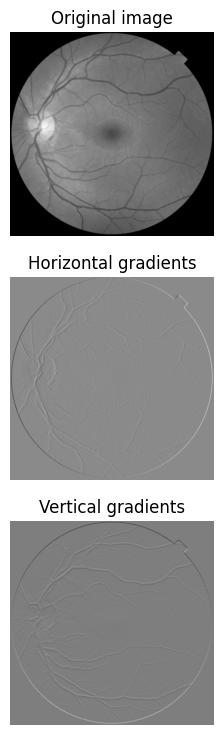

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')

## Task 1. Design your code to compute diagonal gradient of the image used in the example and visualize it

In [ ]:
# write your code here

image_1 = color.rgb2gray(data.retina())

gdiag = np.empty(image_1.shape, dtype=np.double)

gdiag[:, 0] = 0
gdiag[:, -1] = 0

gdiag[0, :] = 0
gdiag[-1, :] = 0

for c in range(1, gdiag.shape[1]-1):
  for z in range(1, gdiag.shape[1]-1):
    gdiag[c,z] = image_1[c-1,z-1] - image_1[c+1,z+1]

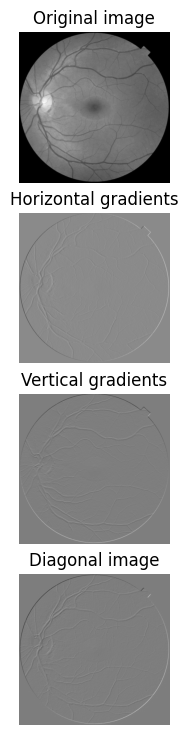

In [ ]:
### Matplotlib incantations
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, figsize=(5, 9), sharex=True, sharey=True)
ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Original image')
ax1.set_adjustable('box')
ax2.axis('off')
ax2.imshow(gx, cmap=plt.cm.gray)
ax2.set_title('Horizontal gradients')
ax2.set_adjustable('box')
ax3.axis('off')
ax3.imshow(gy, cmap=plt.cm.gray)
ax3.set_title('Vertical gradients')
ax3.set_adjustable('box')
ax4.axis('off')
ax4.imshow(gdiag, cmap=plt.cm.gray)
ax4.set_title('Diagonal image')
ax4.set_adjustable('box')

## **Question 1**. Explain why we don't directly use the simplest image features (color or number of pixels)

**Answer to Q1**: type your answer here


---

## (Tutorial) HOG image features

In [ ]:
# read image and convert it to grayscale
image = color.rgb2gray(data.chelsea())
# extract HOG features from the input image with predefined parameters
fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16),
                    cells_per_block=(1, 1), visualize=True)

hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 0.02))

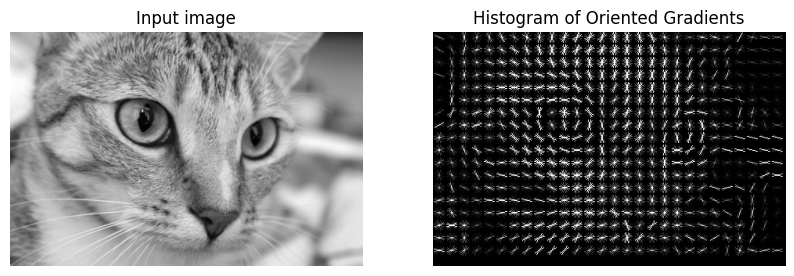

In [ ]:
# visualize the original image and the hog features
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,4), sharex=True, sharey=True)

ax1.axis('off')
ax1.imshow(image, cmap=plt.cm.gray)
ax1.set_title('Input image')
ax1.set_adjustable('box')

ax2.axis('off')
ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray)
ax2.set_title('Histogram of Oriented Gradients')
ax2.set_adjustable('box')

## Task 2. ORB keypoints extraction and visualization
Apart from HOG image features, another popular image feature is ORB.<br>
Please extract keypoints from the image used in HOG example using on ORB features and visualize the keypoints on the original image

In [ ]:
# write your code here

# Load the image

#image1 = cv2.imread('color_img.jpg')
image1 = data.chelsea()

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

#image2 = color.rgb2gray(data.chelsea())



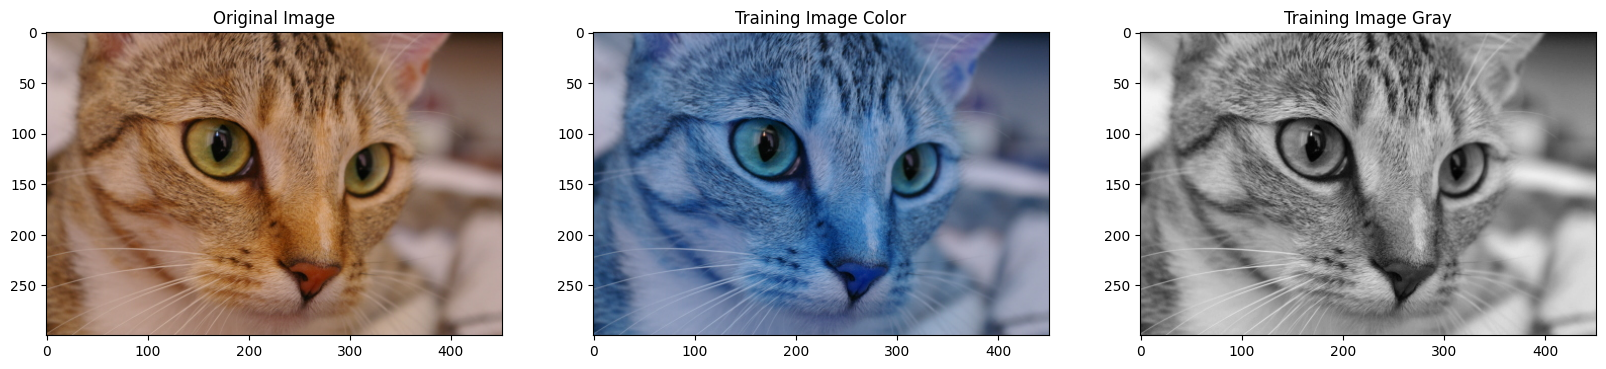

In [ ]:
# Display traning image and testing image
fx, plots = plt.subplots(1, 3, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(image1)

plots[1].set_title("Training Image Color")
plots[1].imshow(training_image)

plots[2].set_title("Training Image Gray")
plots[2].imshow(training_gray, cmap=plt.cm.gray)

Number of Keypoints Detected In The Training Image:  488


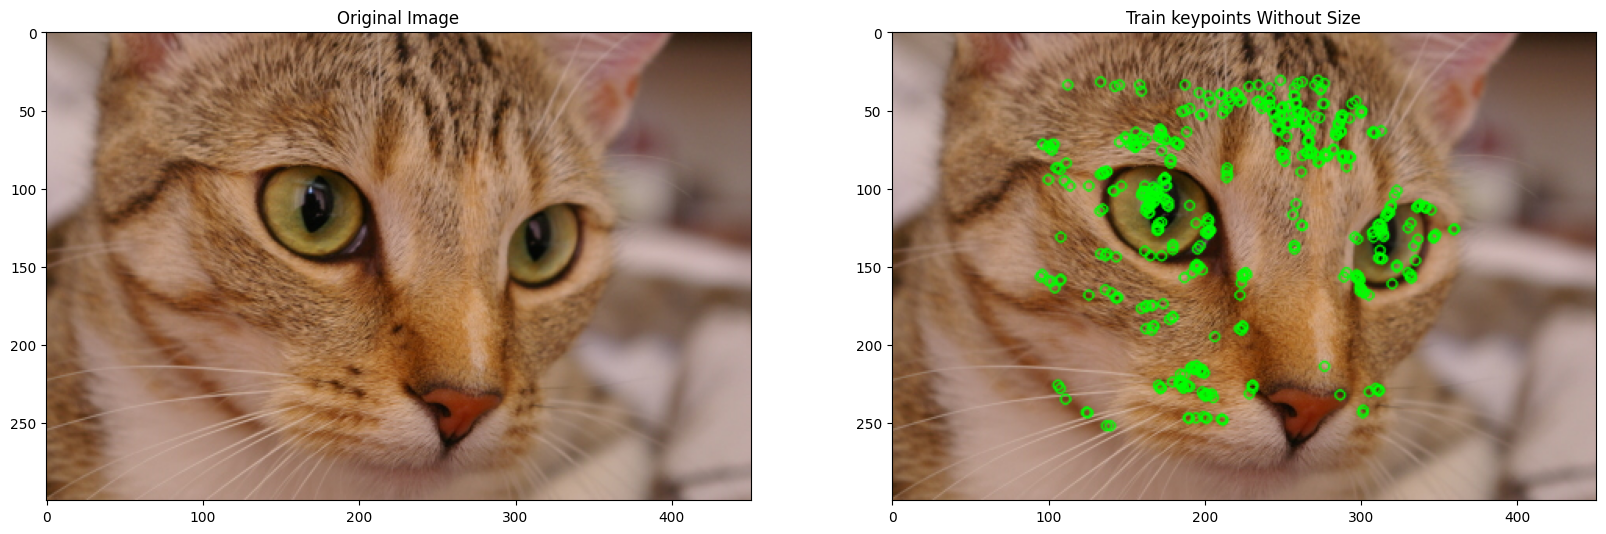

In [ ]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)


keypoints_without_size = np.copy(image1)

cv2.drawKeypoints(image1, train_keypoints, keypoints_without_size, color = (0, 255, 0))

# Display image without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(image1)

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))


## (Tutorial) Bag-of-Visual-Words
In the tutorial code, we create the code words only based on one image

In [ ]:
# defining feature extractor that we want to use (ORB feature used in this extractor)
def features(image):
    extractor = cv2.ORB_create()
    keypoints, descriptors = extractor.detectAndCompute(image, None)
    return keypoints, descriptors

In [ ]:
# builing visual words histogram based on the descriptors of the image and the clustering algorithm
def build_histogram(descriptor_list, cluster_alg):
    histogram = np.zeros(len(cluster_alg.cluster_centers_))
    cluster_result =  cluster_alg.predict(descriptor_list)
    for i in cluster_result:
        histogram[i] += 1.0
    return histogram

In [ ]:
# Clustring the bag-of-visual-words by Kmeans method
from sklearn.cluster import KMeans
img = data.chelsea()
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The histogram of visual words')

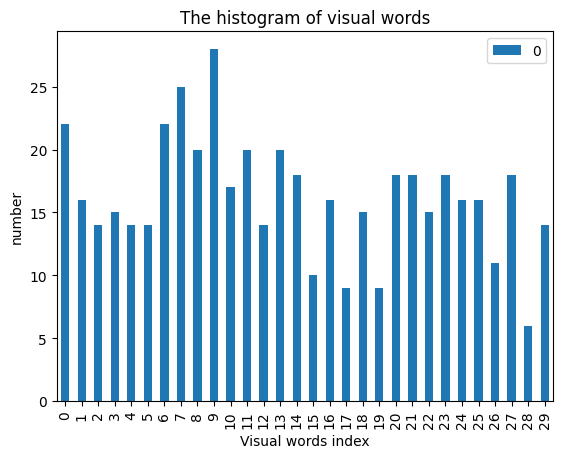

In [ ]:
import pandas as pd
df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Task 3. Bag-of-Visual-Words for multiple images
Create your bag-of-visual-words with 10 images and visualize the histogram of visual words. The 10 images belong to one category(dog, cat, bike, etc.)

In [ ]:
# write your code here

In [ ]:
##Directory download
#!gdown --folder 'https://drive.google.com/drive/folders/1QQWDThiw8NKgmn61-X4NQqw-MpQdhDji'

##One file download
#!gdown '1FznLEKLEnBrab-4DJe4qzh1vbejLkbhH'

In [ ]:
!gdown --folder 'https://drive.google.com/drive/folders/1QQWDThiw8NKgmn61-X4NQqw-MpQdhDji'

Retrieving folder list
Processing file 1FznLEKLEnBrab-4DJe4qzh1vbejLkbhH cat1.jpeg
Processing file 1AAF-QoNsLTlThb9tmCpv1PIicPJnGv7w cat2.jpeg
Processing file 11eQ_C7pJPaUtioQpbu6HRwkECIx2c7ua cat3.jpeg
Processing file 1BE2hTZAjZcjS1K-w7N5o0sx4Unb6VCd8 cat4.jpeg
Processing file 1ORl7V_sc4l2UMaPg9b4VINIBnWv-ok-k cat5.jpeg
Processing file 1ygp2qzN4IEbmu5WpdUfeonYcJPQrC37k cat6.jpeg
Processing file 1UFNO2dTh_RcJJG7Nw4R3Ir_eMFFsRtF2 cat7.jpeg
Processing file 1XGWBvaYT0Sx7I5YnchYUKowjxwRSx71i cat8.jpeg
Processing file 1go0wF8GFsJvLJg3Ki6LiDpCBl6fyoydS cat9.jpeg
Processing file 1pm7X47M7Pu5lbcqvpVTb9B2-aA1kL8Xh cat10.jpeg
Retrieving folder list completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1FznLEKLEnBrab-4DJe4qzh1vbejLkbhH
To: /content/cats/cat1.jpeg
100% 3.13k/3.13k [00:00<00:00, 4.36MB/s]
Downloading...
From: https://drive.google.com/uc?id=1AAF-QoNsLTlThb9tmCpv1PIicPJnGv7w
To: /content/cats/cat2.jpeg
100% 3

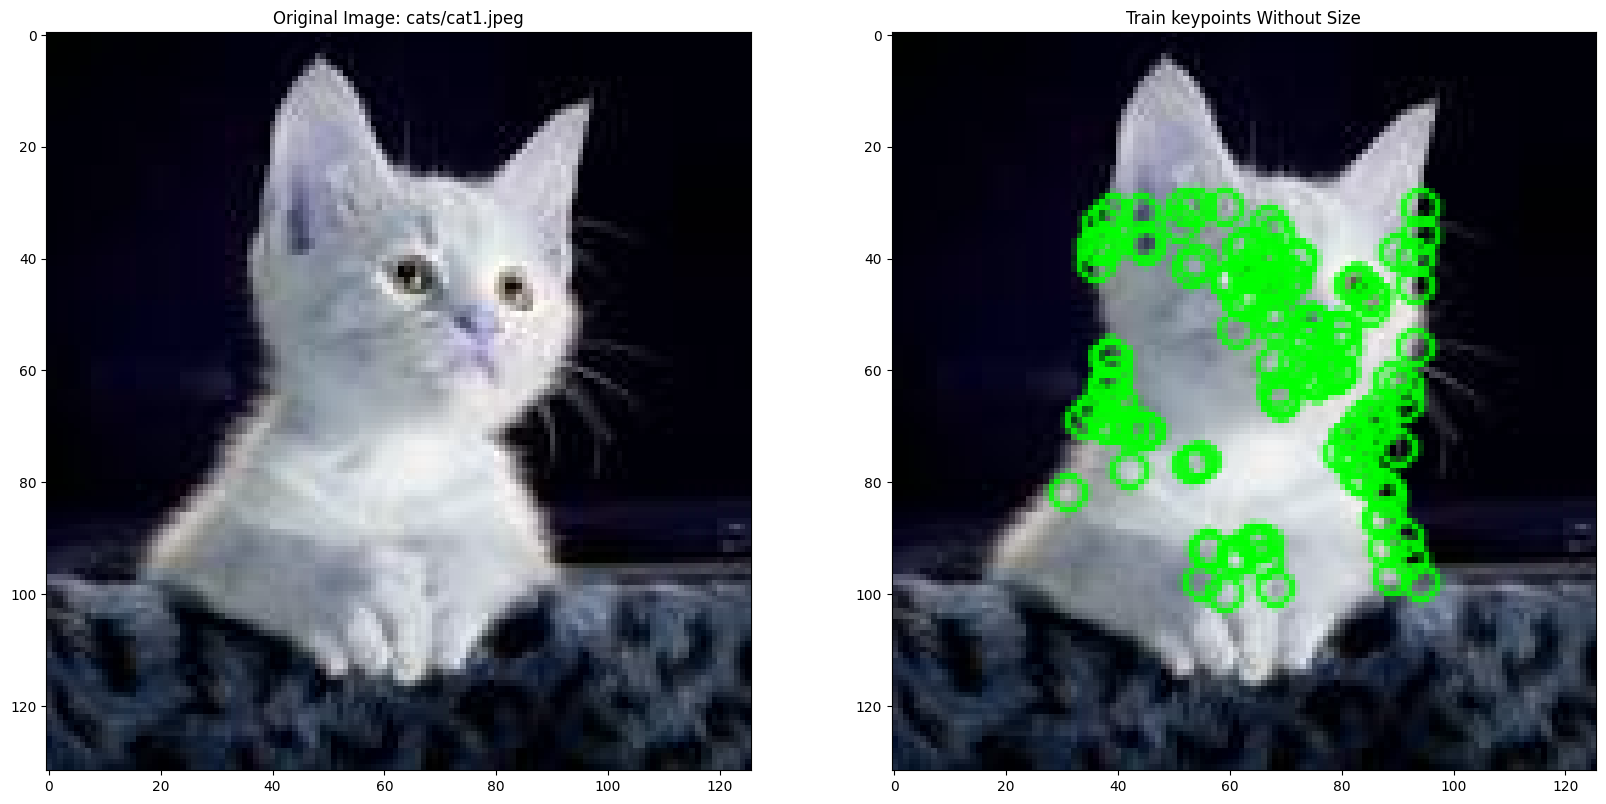

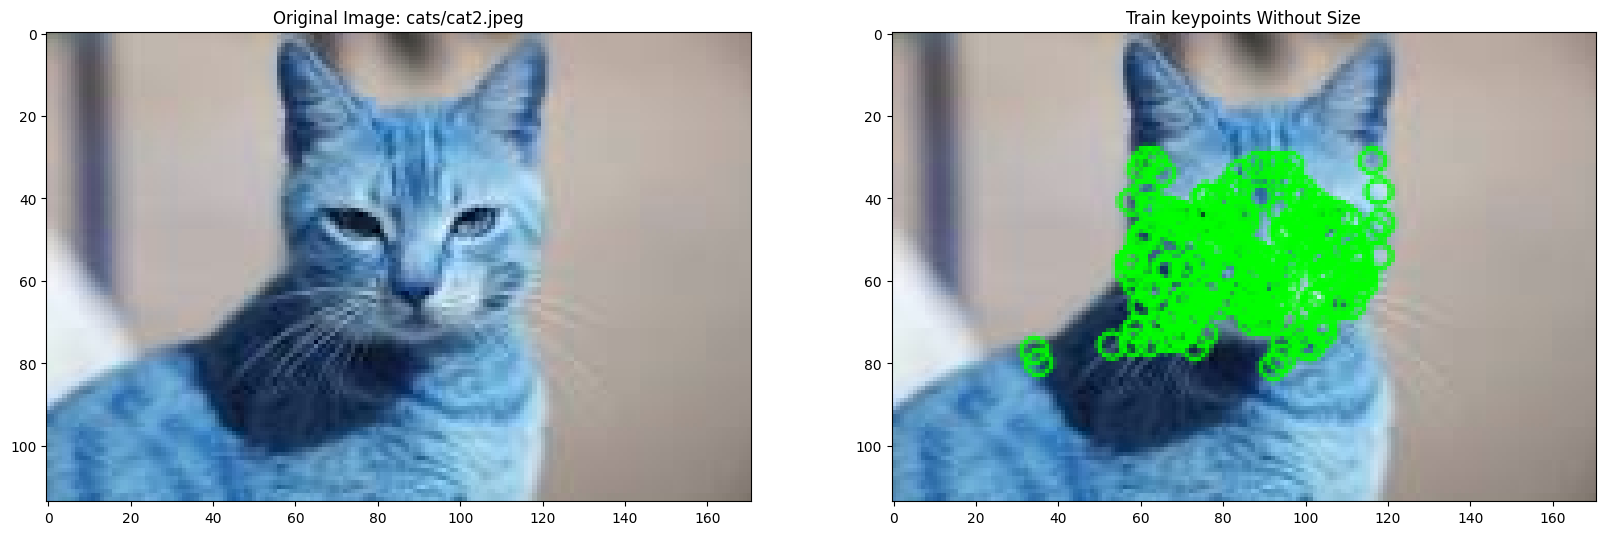

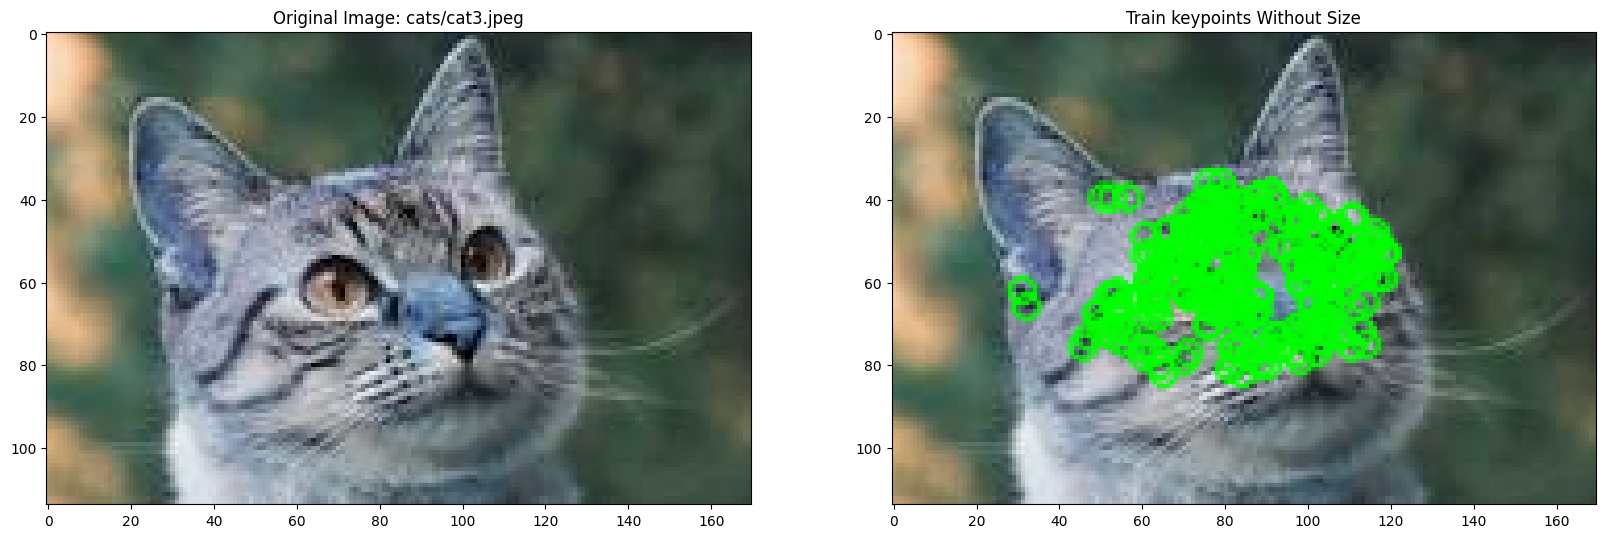

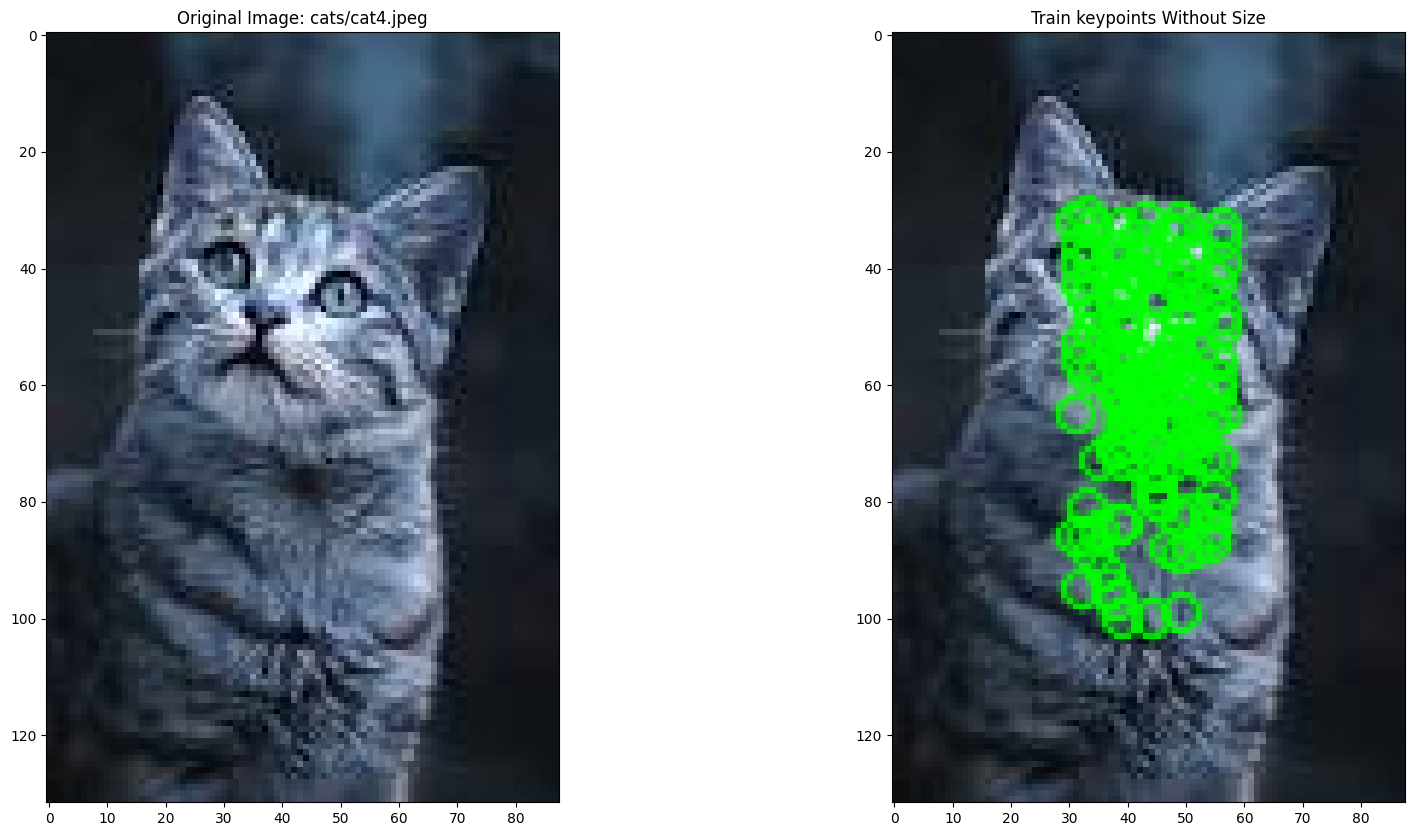

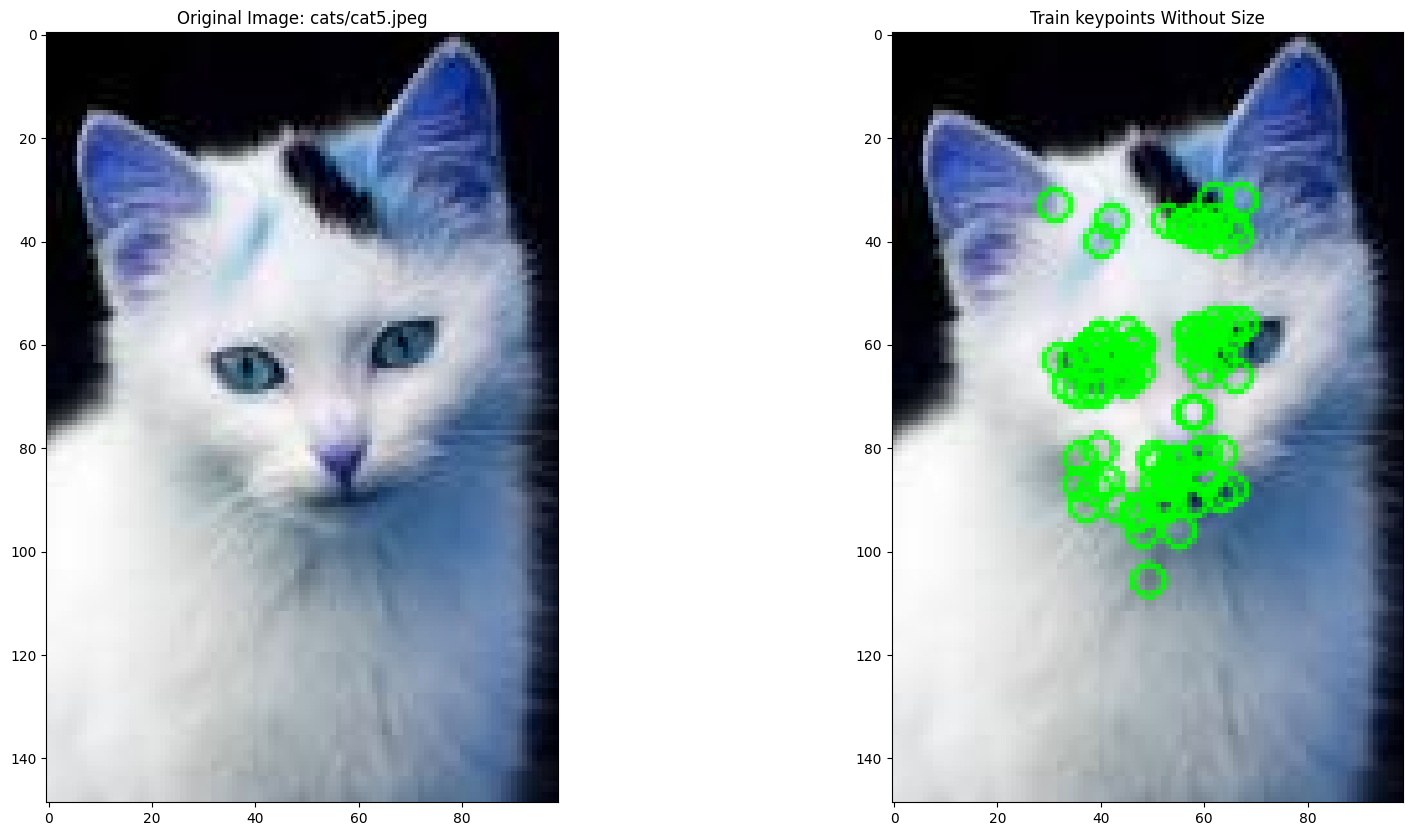

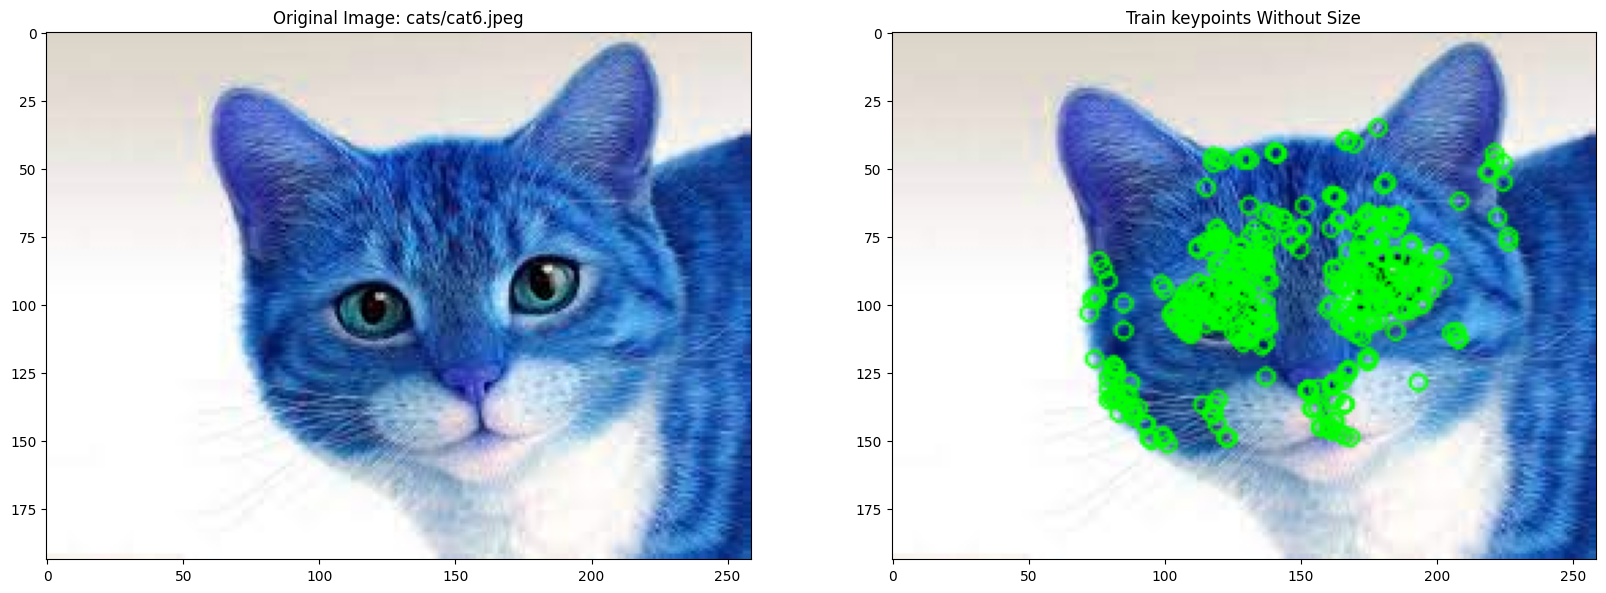

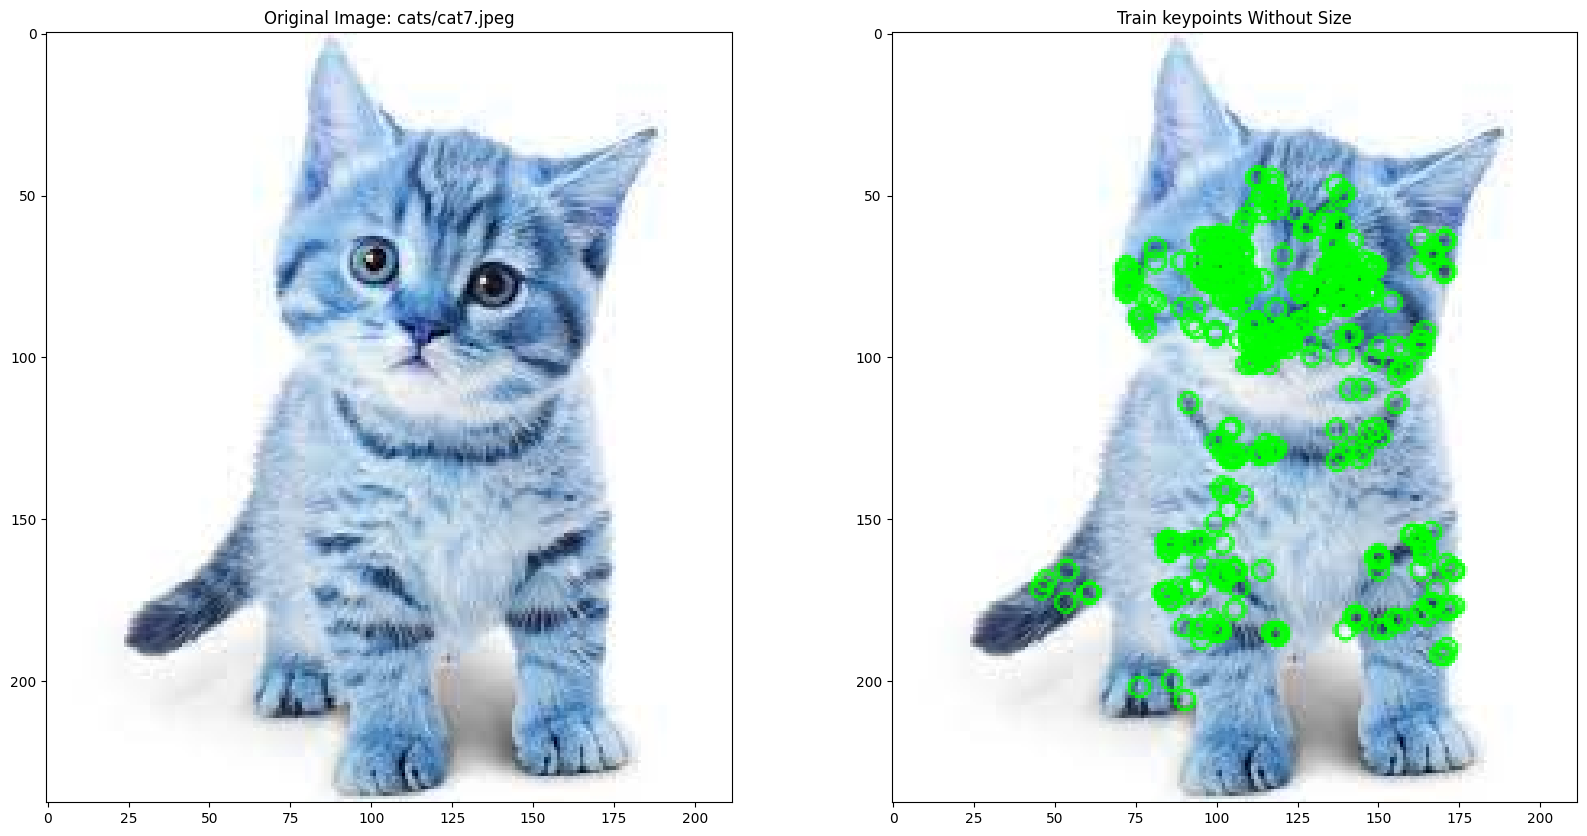

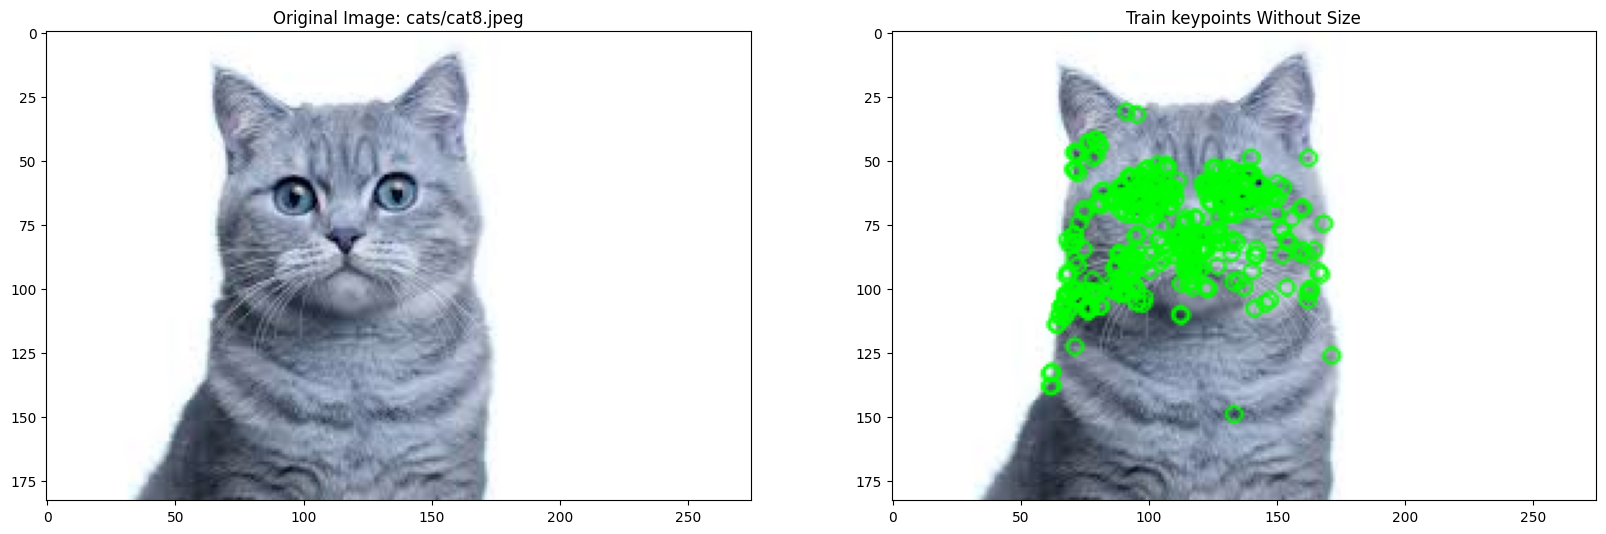

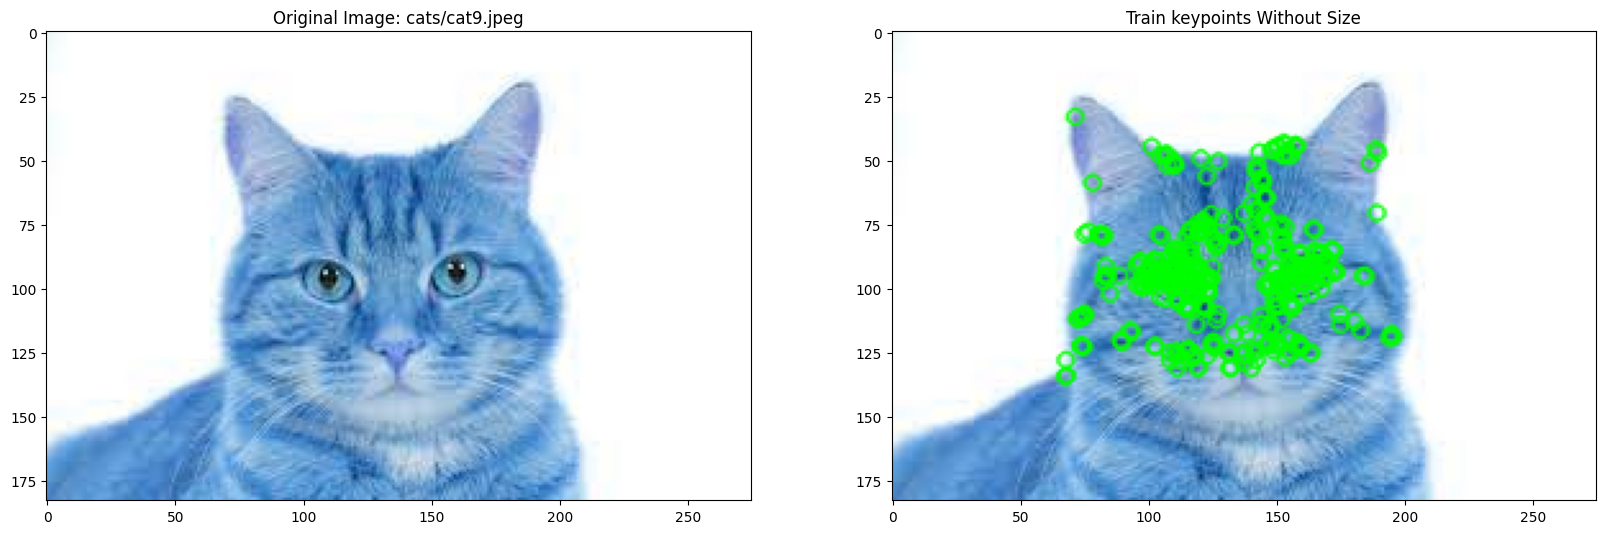

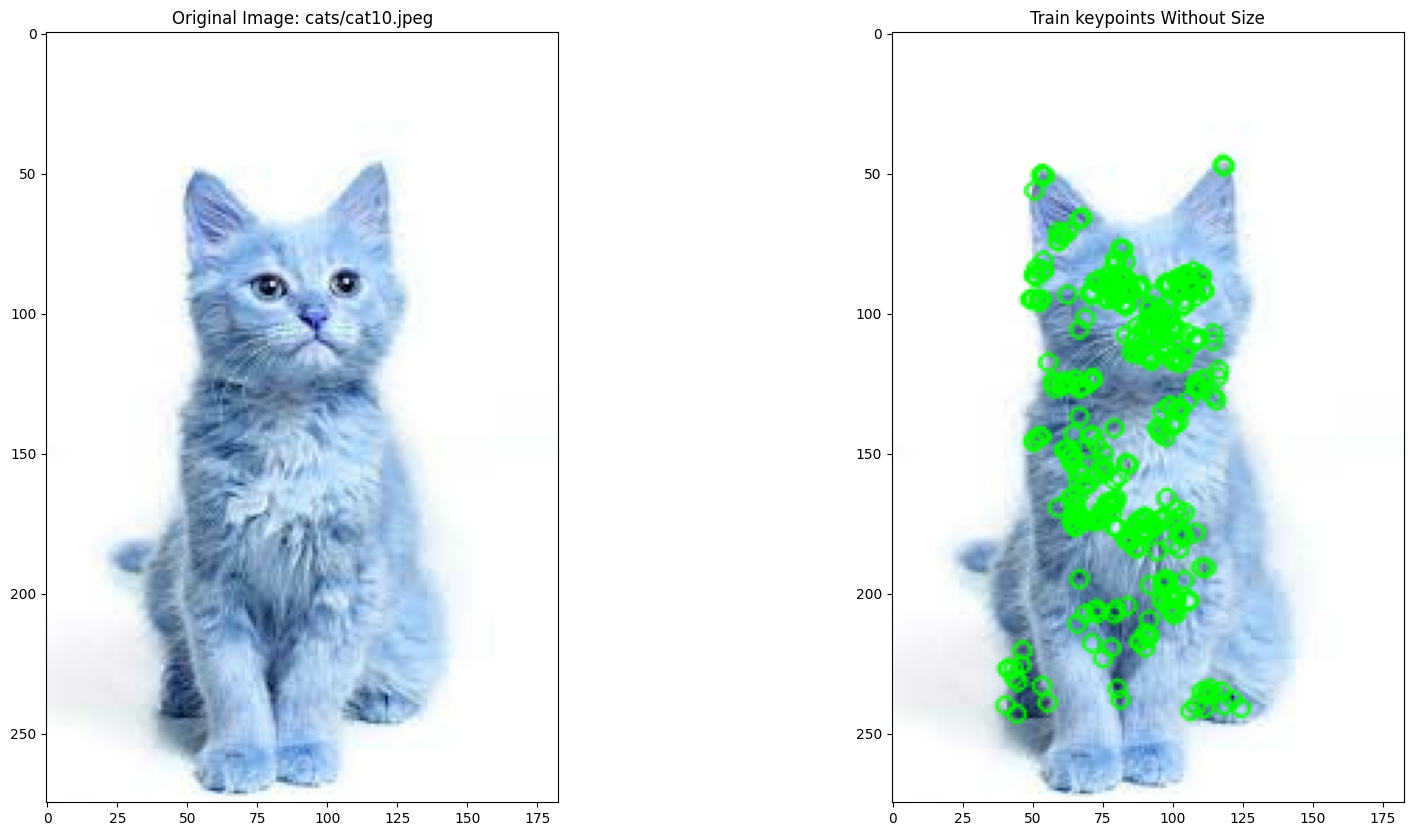

In [ ]:
for i in range (1,11):
  file_name = 'cats/cat' + str(i) + '.jpeg'
  img = cv2.imread(file_name)
  kp, descriptor_list = features(img)
  keypoints_without_size = np.copy(img)
  cv2.drawKeypoints(img, kp, keypoints_without_size, color = (0, 255, 0))

  # Display image without keypoints size
  fx, plots = plt.subplots(1, 2, figsize=(20,10))

  plots[0].set_title('Original Image: ' + file_name )
  plots[0].imshow(img)

  plots[1].set_title("Train keypoints Without Size")
  plots[1].imshow(keypoints_without_size, cmap='gray')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Text(0.5, 1.0, 'The histogram of visual words')

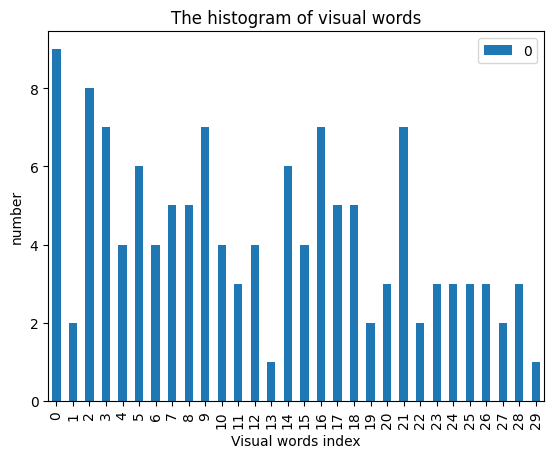

In [ ]:
img = cv2.imread('cats/cat1.jpeg')
kmeans = KMeans(n_clusters = 30)
kp, descriptor_list = features(img)
kmeans.fit(descriptor_list)
images = []
images.append(img)
preprocessed_image = []
for image in images:
      # image = gray(image)
      keypoint, descriptor = features(image)
      if (descriptor is not None):
          histogram = build_histogram(descriptor, kmeans)
          preprocessed_image.append(histogram)

df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 1.0, 'The histogram of visual words')

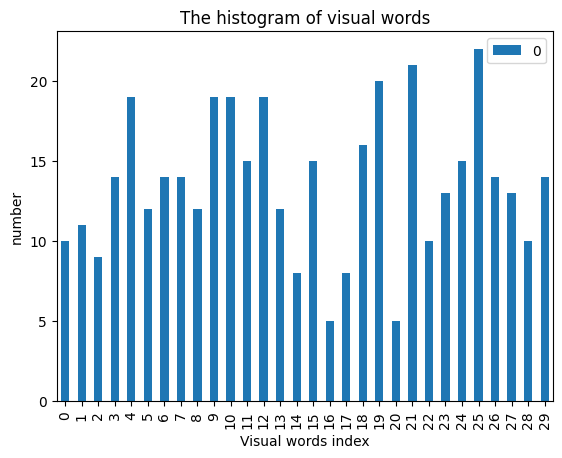

In [ ]:
for i in range (1,11):
  file_name = 'cats/cat' + str(i) + '.jpeg'
  img = cv2.imread(file_name)
  kmeans = KMeans(n_clusters = 30)
  kp, descriptor_list = features(img)
  kmeans.fit(descriptor_list)
  images = []
  images.append(img)
  preprocessed_image = []
  for image in images:
    # image = gray(image)
    keypoint, descriptor = features(image)
    if (descriptor is not None):
      histogram = build_histogram(descriptor, kmeans)
      preprocessed_image.append(histogram)


df = pd.DataFrame(preprocessed_image[0])
df.plot.bar()
#plt.grid(axis = 'y', alpha = 0.75)
plt.xlabel('Visual words index')
plt.ylabel('number')
plt.title('The histogram of visual words')

## Question 2. Recall that the feature scaling does not have a large effect on classification accuracy (tf-idf). How about the effect of feature scaling in Bag-of-Visual-Words? Explain it.

**Answer to Q2**: type your answer here

---

## Question 3. What is the advantage of ORB(Oriented FAST and Rotated Brief) over SURF (Speeded up robust features). Explain briefly (Minimum of 10 words and maximum of 150 words)

**Answer to Q3**: type your answer here

## Task 4. Extract text from image
Image file is given along with ICE-5-2.ipynb in canvas assignment .

Save it in drive and use get shareable link to everyone option . Image file name is **ExtractText4.jpeg**

Please extract the image from image file and print the text that you extracted.

In [ ]:
# write your code here

In [ ]:
!gdown '1npzClrpM0e4bxdcDP3_933JJbIGmW0A_'

Downloading...
From: https://drive.google.com/uc?id=1npzClrpM0e4bxdcDP3_933JJbIGmW0A_
To: /content/ExtractText4.jpeg
100% 14.0k/14.0k [00:00<00:00, 34.6MB/s]


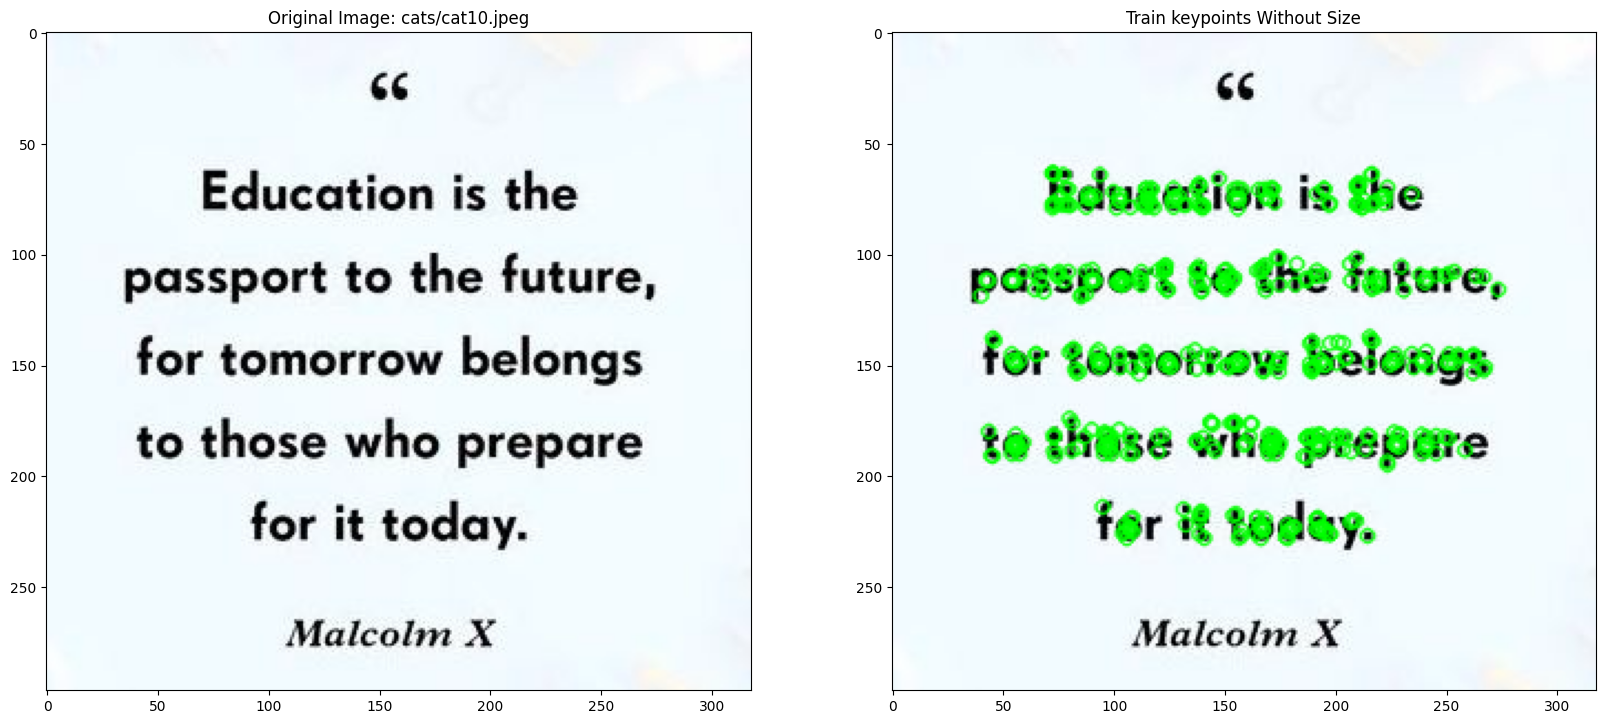

In [ ]:
img = cv2.imread('ExtractText4.jpeg')
kp, descriptor_list = features(img)
keypoints_without_size = np.copy(img)
cv2.drawKeypoints(img, kp, keypoints_without_size, color = (0, 255, 0))

# Display image without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title('Original Image: ' + file_name )
plots[0].imshow(img)

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

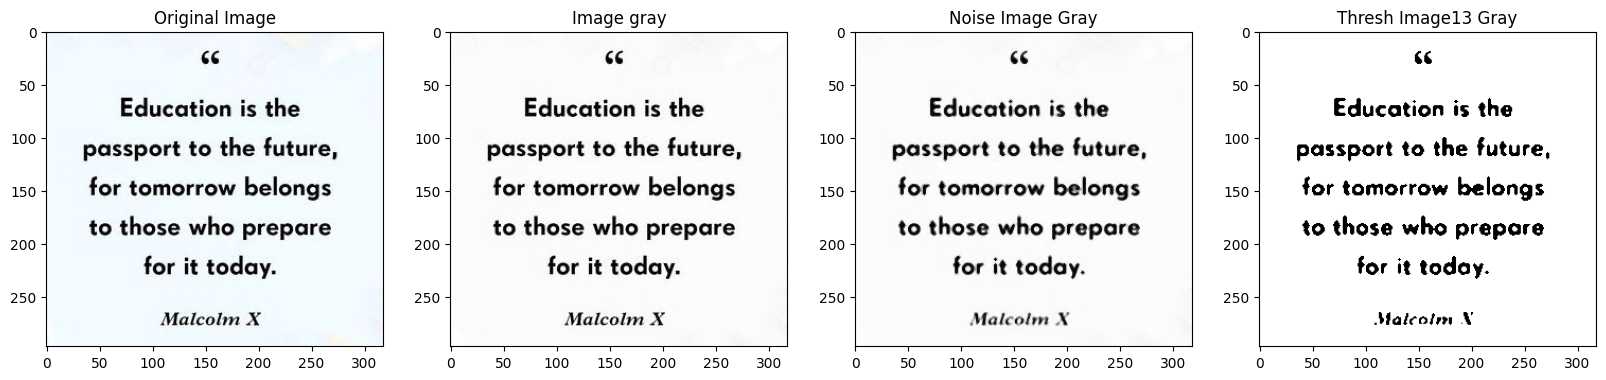

In [ ]:
image11 = cv2.imread('ExtractText4.jpeg')

# get grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#noise removal
noise=cv2.medianBlur(gray,3)
thresh = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

fx, plots = plt.subplots(1, 4, figsize=(20,10))

plots[0].set_title("Original Image")
plots[0].imshow(image11)

plots[1].set_title("Image gray")
plots[1].imshow(gray, cmap='gray')

plots[2].set_title("Noise Image Gray")
plots[2].imshow(noise, cmap='gray')

plots[3].set_title("Thresh Image13 Gray")
plots[3].imshow(thresh, cmap='gray')



In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import easyocr
img = cv2.imread('ExtractText4.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
noise=cv2.medianBlur(gray,3)
thresh = cv2.threshold(noise, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]
reader = easyocr.Reader(['en'])
result = reader.readtext(img, paragraph="False")
df=pd.DataFrame(result)
print(df[1])

0                                     Education is the
1    passport to the future, for tomorrow belongs t...
2                                            Malcolm X
Name: 1, dtype: object


In [ ]:
print(df[1][0])
print(df[1][1])
print(df[1][2])

Education is the
passport to the future, for tomorrow belongs to those who prepare for it today:
Malcolm X


###Reference:

https://medium.com/@draj0718/text-recognition-and-extraction-in-images-93d71a337fc8

## Task 5. Design code to implement **ORB** using **OpenCV**. Please use a face image (Preferably your face image as its unique).

Keep your face image file name as **faceimg.jpg**
Save it in drive and use get shareable link to everyone option.

Please print the following during the implementation

* Training image and Testing image

* Number of Keypoints Detected In The Training Image (Not just number image too)

* Number of Keypoints Detected In The Query Image (Not just number image too)

* Number of Matching Keypoints Between The Training and Query Images (Not just number image too)



In [ ]:
## Write your code here

In [ ]:
!gdown '1FRYaJYBEjtnlM68fa5a3sY0IvJjgS3-D'

Downloading...
From: https://drive.google.com/uc?id=1FRYaJYBEjtnlM68fa5a3sY0IvJjgS3-D
To: /content/train1.jpg
100% 120k/120k [00:00<00:00, 78.2MB/s]


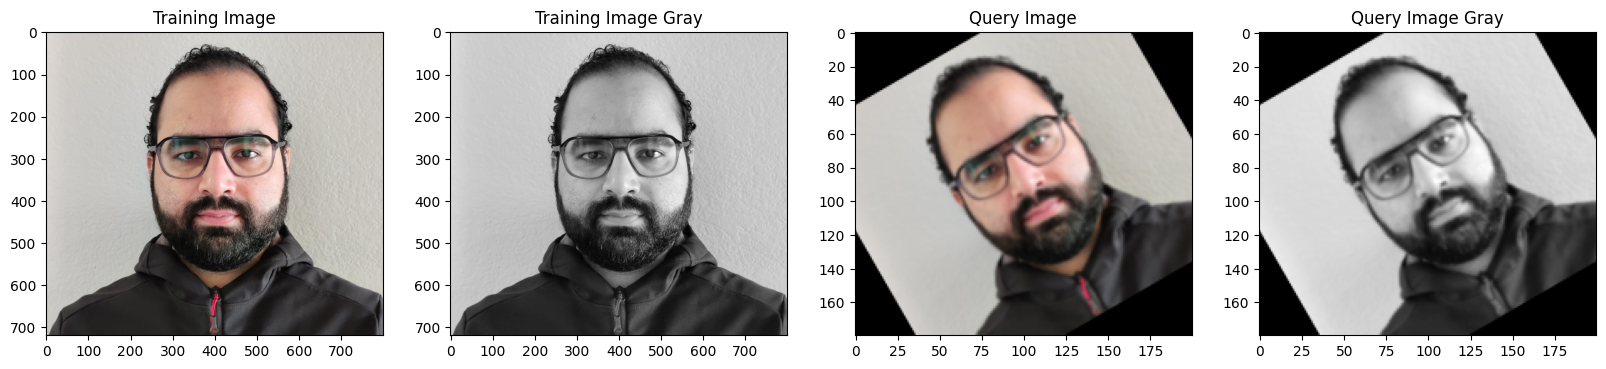

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
#%matplotlib inline

# Load the image
image1 = cv2.imread('train1.jpg')

# Convert the training image to RGB
training_image = cv2.cvtColor(image1, cv2.COLOR_BGR2RGB)

# Convert the training image to gray scale
training_gray = cv2.cvtColor(training_image, cv2.COLOR_RGB2GRAY)

# Create test image by adding Scale Invariance and Rotational Invariance
test_image = cv2.pyrDown(training_image)
test_image = cv2.pyrDown(test_image)
num_rows, num_cols = test_image.shape[:2]

rotation_matrix = cv2.getRotationMatrix2D((num_cols/2, num_rows/2), 30, 1)
test_image = cv2.warpAffine(test_image, rotation_matrix, (num_cols, num_rows))

test_gray = cv2.cvtColor(test_image, cv2.COLOR_RGB2GRAY)

# Display traning image and testing image
fx, plots = plt.subplots(1, 4, figsize=(20,10))

plots[0].set_title("Training Image")
plots[0].imshow(training_image)

plots[1].set_title("Training Image Gray")
plots[1].imshow(training_gray, cmap='gray')

plots[2].set_title("Query Image")
plots[2].imshow(test_image)

plots[3].set_title("Query Image Gray")
plots[3].imshow(test_gray, cmap='gray')

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  374


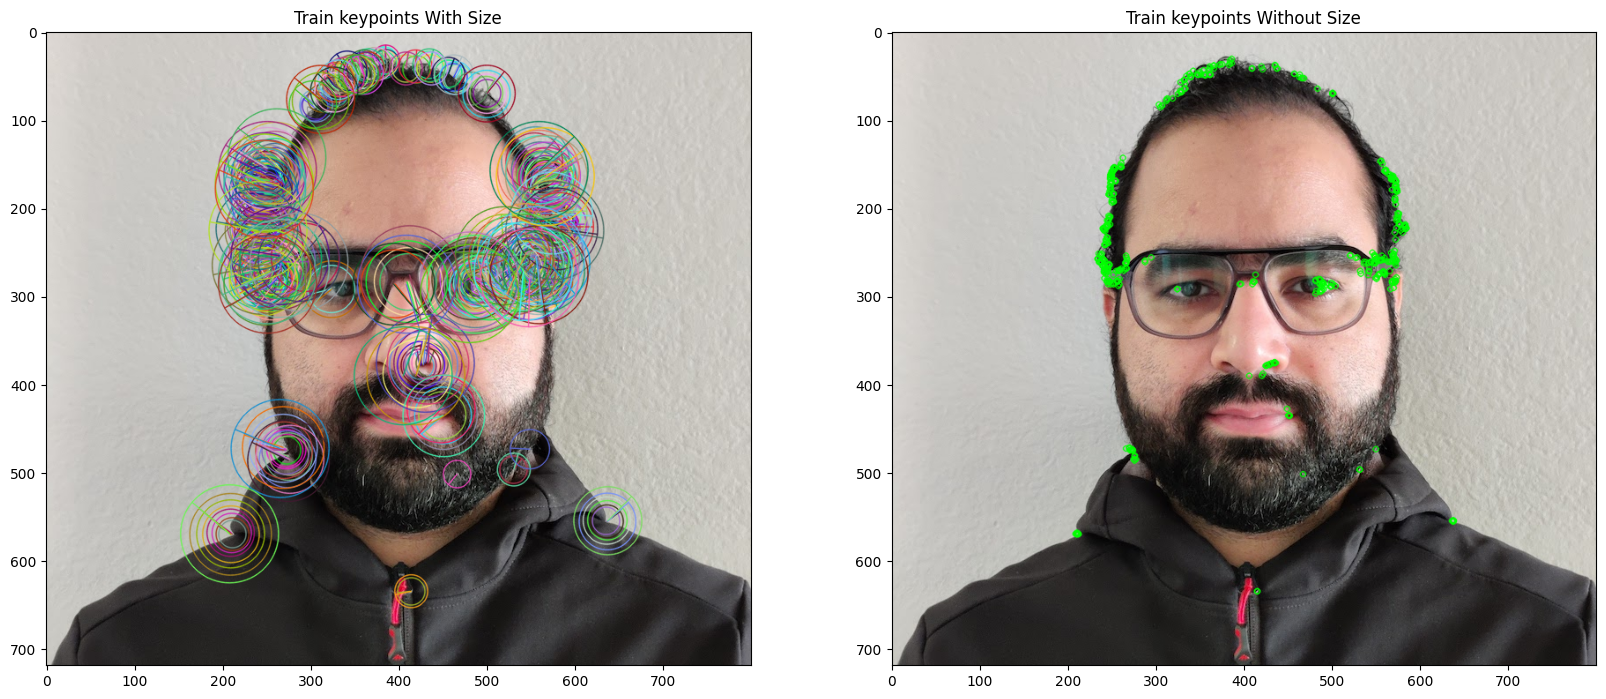

In [ ]:
orb = cv2.ORB_create()

train_keypoints, train_descriptor = orb.detectAndCompute(training_gray, None)
test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

keypoints_without_size = np.copy(training_image)
keypoints_with_size = np.copy(training_image)

cv2.drawKeypoints(training_image, train_keypoints, keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(training_image, train_keypoints, keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Train keypoints With Size")
plots[0].imshow(keypoints_with_size, cmap='gray')

plots[1].set_title("Train keypoints Without Size")
plots[1].imshow(keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

Number of Keypoints Detected In The Training Image:  500
Number of Keypoints Detected In The Query Image:  374


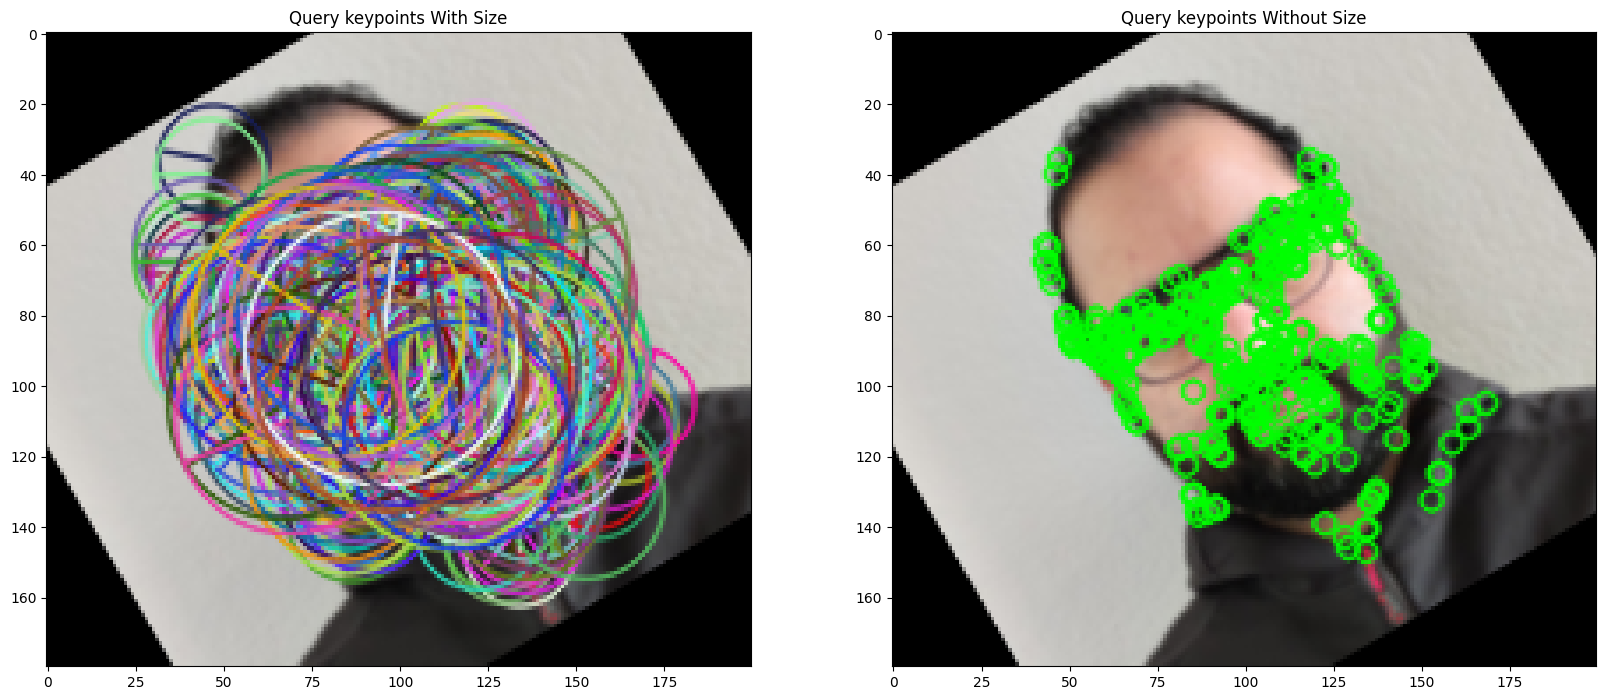

In [ ]:

test_keypoints, test_descriptor = orb.detectAndCompute(test_gray, None)

test_keypoints_without_size = np.copy(test_image)
test_keypoints_with_size = np.copy(test_image)

cv2.drawKeypoints(test_image, test_keypoints, test_keypoints_without_size, color = (0, 255, 0))

cv2.drawKeypoints(test_image, test_keypoints, test_keypoints_with_size, flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display image with and without keypoints size
fx, plots = plt.subplots(1, 2, figsize=(20,10))

plots[0].set_title("Query keypoints With Size")
plots[0].imshow(test_keypoints_with_size, cmap='gray')

plots[1].set_title("Query keypoints Without Size")
plots[1].imshow(test_keypoints_without_size, cmap='gray')

# Print the number of keypoints detected in the training image
print("Number of Keypoints Detected In The Training Image: ", len(train_keypoints))

# Print the number of keypoints detected in the query image
print("Number of Keypoints Detected In The Query Image: ", len(test_keypoints))

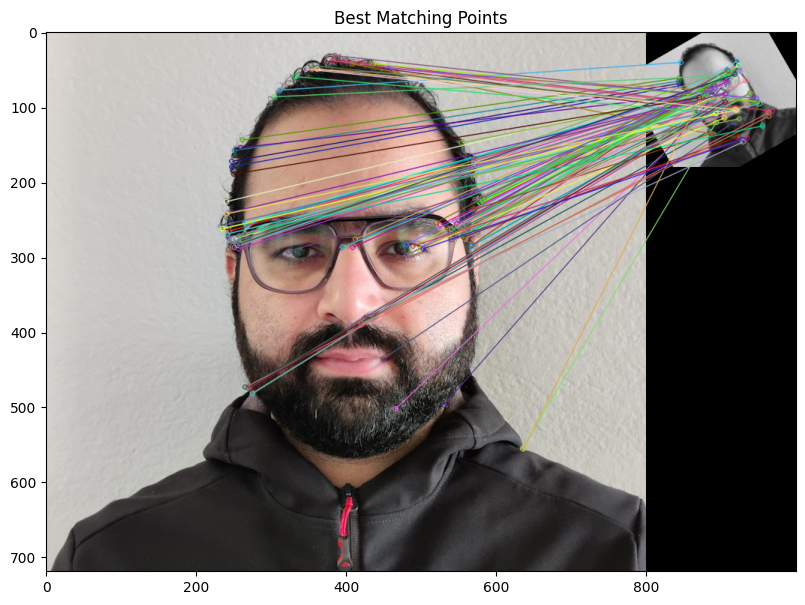


Number of Matching Keypoints Between The Training and Query Images:  111


In [ ]:
# Create a Brute Force Matcher object.
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck = True)

# Perform the matching between the ORB descriptors of the training image and the test image
matches = bf.match(train_descriptor, test_descriptor)

# The matches with shorter distance are the ones we want.
matches = sorted(matches, key = lambda x : x.distance)

result = cv2.drawMatches(training_image, train_keypoints, test_gray, test_keypoints, matches, test_gray, flags = 2)

# Display the best matching points
plt.rcParams['figure.figsize'] = [14.0, 7.0]
plt.title('Best Matching Points')
plt.imshow(result)
plt.show()

# Print total number of matching points between the training and query images
print("\nNumber of Matching Keypoints Between The Training and Query Images: ", len(matches))

###References:

https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf

https://github.com/deepanshut041/feature-detection/blob/master/orb/orb.ipynb
